In [10]:
import pandas as pd
import wikipedia
from bs4 import BeautifulSoup

In [14]:
la = wikipedia.page("Wikipedia:Good_articles/By_length")
html_soup = BeautifulSoup(la.html(), 'html.parser')
#download from Wikipedia and parse with BeautifulSoup

In [31]:
html_table = html_soup.find_all("tbody")[1]
data_table = []
for row in html_table.find_all('tr'):
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text)
    data_table.append(row_data)
df_raw = pd.DataFrame(data_table)
#make dataframe

In [33]:
df = df_raw.replace(r'\n',' ', regex=True).drop([0], axis = 1).drop([0], axis = 0)
df.columns = ["Article Title", "Length (Bytes)"]
#clean dataframe

,Article Title,Length (Bytes)
1,Plug-in_electric_vehicle,282783
2,George_W._Bush,267804
3,Eurozone_crisis,254332
4,Political_abuse_of_psychiatry_in_the_Soviet_Un...,250502
5,2013_Penn_State_Nittany_Lions_football_team,245350


In [36]:
import sqlalchemy
%load_ext sql
engine = sqlalchemy.create_engine('sqlite:///long_articles.db')
%sql sqlite:///long_articles.db
#create sql database

In [37]:
df.to_sql('data', con=engine, if_exists='replace')

1000

In [77]:
counts = %sql SELECT COUNT(*) FROM data WHERE "Article Title" LIKE "20%" UNION SELECT COUNT(*) FROM data WHERE "Article Title" LIKE "19%";

 * sqlite:///long_articles.db
Done.


In [87]:
counts_df = counts.DataFrame()
counts_df.insert(1, "Century", ['20th', '21st'], True)
#creates df showing number of articles per century

,COUNT(*),Century
0,5,20th
1,59,21st


In [110]:
import matplotlib.pyplot as plt
plt.style.use("default")

Text(0.5, 1.0, 'Good long articles describing 20th and 21st century events')

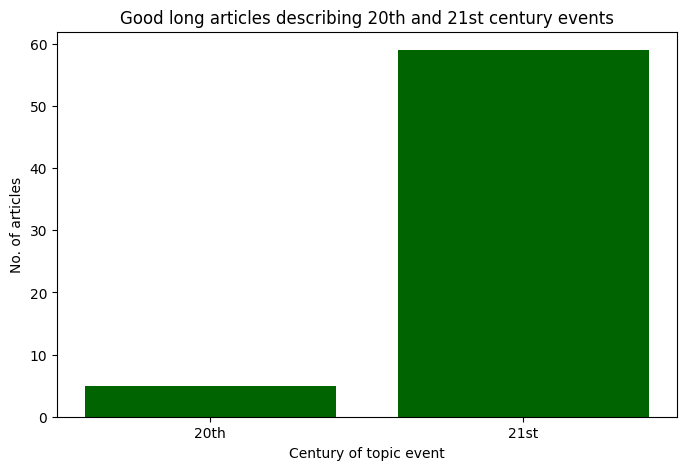

In [112]:
fig = plt.figure(figsize = (8,5))
plt.bar(counts_df["Century"], counts_df["COUNT(*)"], color = "darkgreen")
plt.xlabel("Century of topic event")
plt.ylabel("No. of articles")
plt.title("Good long articles describing 20th and 21st century events")

In [114]:
engine.dispose()